<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime, timedelta


# The tech stocks we'll use for this analysis
tech_list = ['BTC', 'AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['BTC', 'AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [BTC, AAPL, GOOG, MSFT, AMZN]
company_name = ["BITCOIN", "APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-06  169.389999  170.710007  167.649994  169.149994  169.149994   
2024-02-07  169.479996  170.880005  168.940002  170.529999  170.529999   
2024-02-08  169.649994  171.429993  168.880005  169.839996  169.839996   
2024-02-09  170.899994  175.000000  170.580002  174.449997  174.449997   
2024-02-12  174.800003  175.389999  171.539993  172.339996  172.339996   
2024-02-13  167.729996  170.949997  165.750000  168.639999  168.639999   
2024-02-14  169.210007  171.210007  168.279999  170.979996  170.979996   
2024-02-15  170.580002  171.169998  167.589996  169.800003  169.800003   
2024-02-16  168.740005  170.419998  167.169998  169.509995  169.509995   
2024-02-20  168.740005  168.710007  166.630005  167.380005  167.380005   

              Volume company_name  
Date                               
2024-02-06  42505500       AMAZON  
2024-02-07  47174100       AMAZON  
2024-02-08  42316500       AMAZON  
2024-02-09  56986000       AMAZON  
2024-02-12  51050400       AMAZON  
2024-02-13  56345100       AMAZON  
2024-02-14  42815500       AMAZON  
2024-02-15  49855200       AMAZON  
2024-02-16  48074600       AMAZON  
2024-02-20   6511893       AMAZON

In [7]:
BTC.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    91.294620   91.326252   91.267856   91.296796   90.086108   
std      1.125741    1.128983    1.119297    1.120588    1.235910   
min     88.430496   88.430496   88.430496   88.430496   87.809784   
25%     90.581873   90.594503   90.571476   90.580349   89.180027   
50%     91.564953   91.566902   91.490650   91.520599   89.956188   
75%     92.152372   92.177500   92.097498   92.133749   90.922762   
max     93.264999   93.389999   93.160004   93.160004   92.820801   

              Volume  
count     250.000000  
mean     2701.572000  
std     13142.087144  
min         1.000000  
25%        21.250000  
50%       238.000000  
75%       906.750000  
max    119712.000000

In [8]:
BTC.head()

Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-02-21  90.500000  90.500000  90.500000  90.500000  88.418869     401   
2023-02-22  90.539902  90.539902  90.430000  90.431503  88.351944     269   
2023-02-23  90.529999  90.591003  90.529999  90.591003  88.507790     202   
2023-02-24  90.300003  90.300003  90.289001  90.294998  88.218582    1348   
2023-02-27  90.400002  90.410004  90.400002  90.406700  88.327713     226   

           company_name  
Date                     
2023-02-21      BITCOIN  
2023-02-22      BITCOIN  
2023-02-23      BITCOIN  
2023-02-24      BITCOIN  
2023-02-27      BITCOIN

In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-21 to 2024-02-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


ValueError: num must be an integer with 1 <= num <= 4, not 5

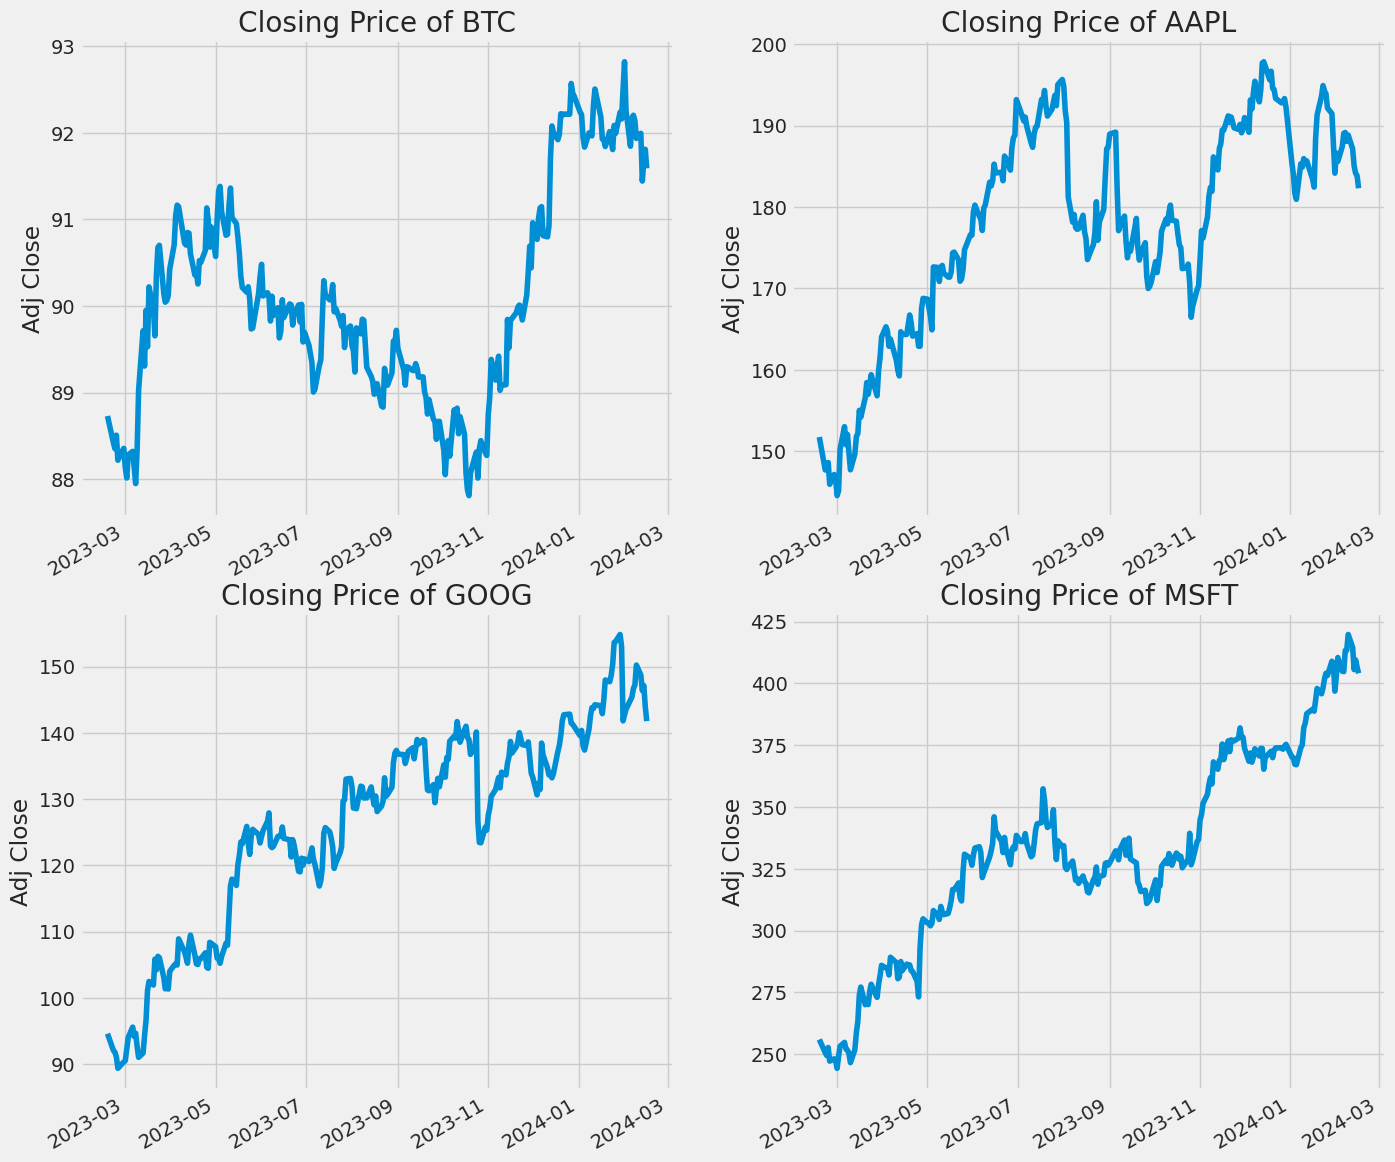

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

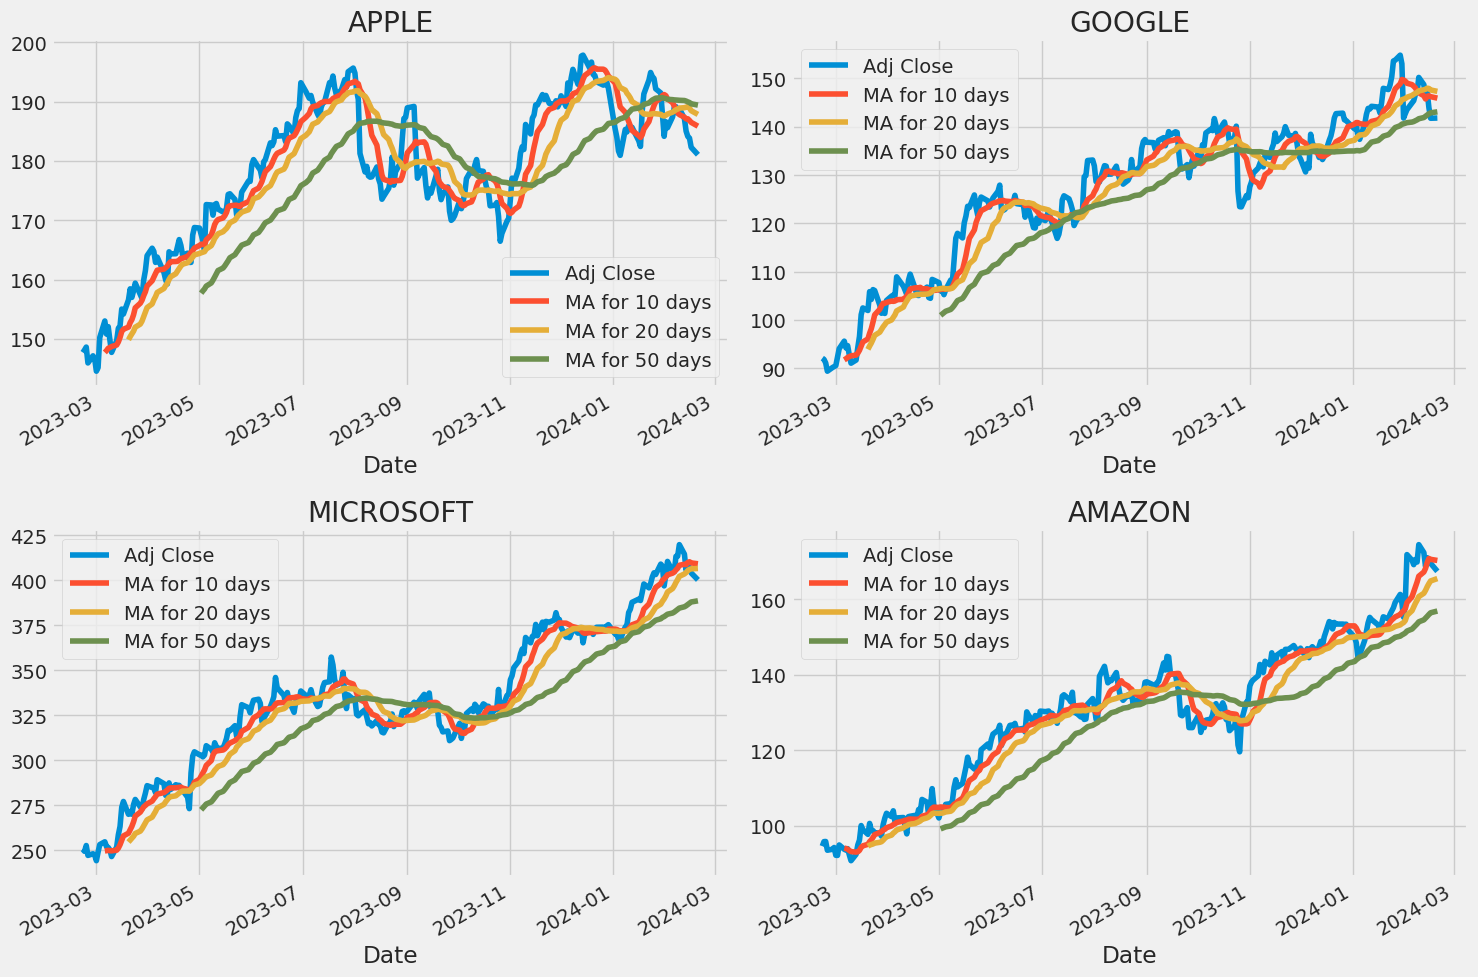

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean() #rolling() clusters data by groups of length ma, and allows us doing math calculations with that groups


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

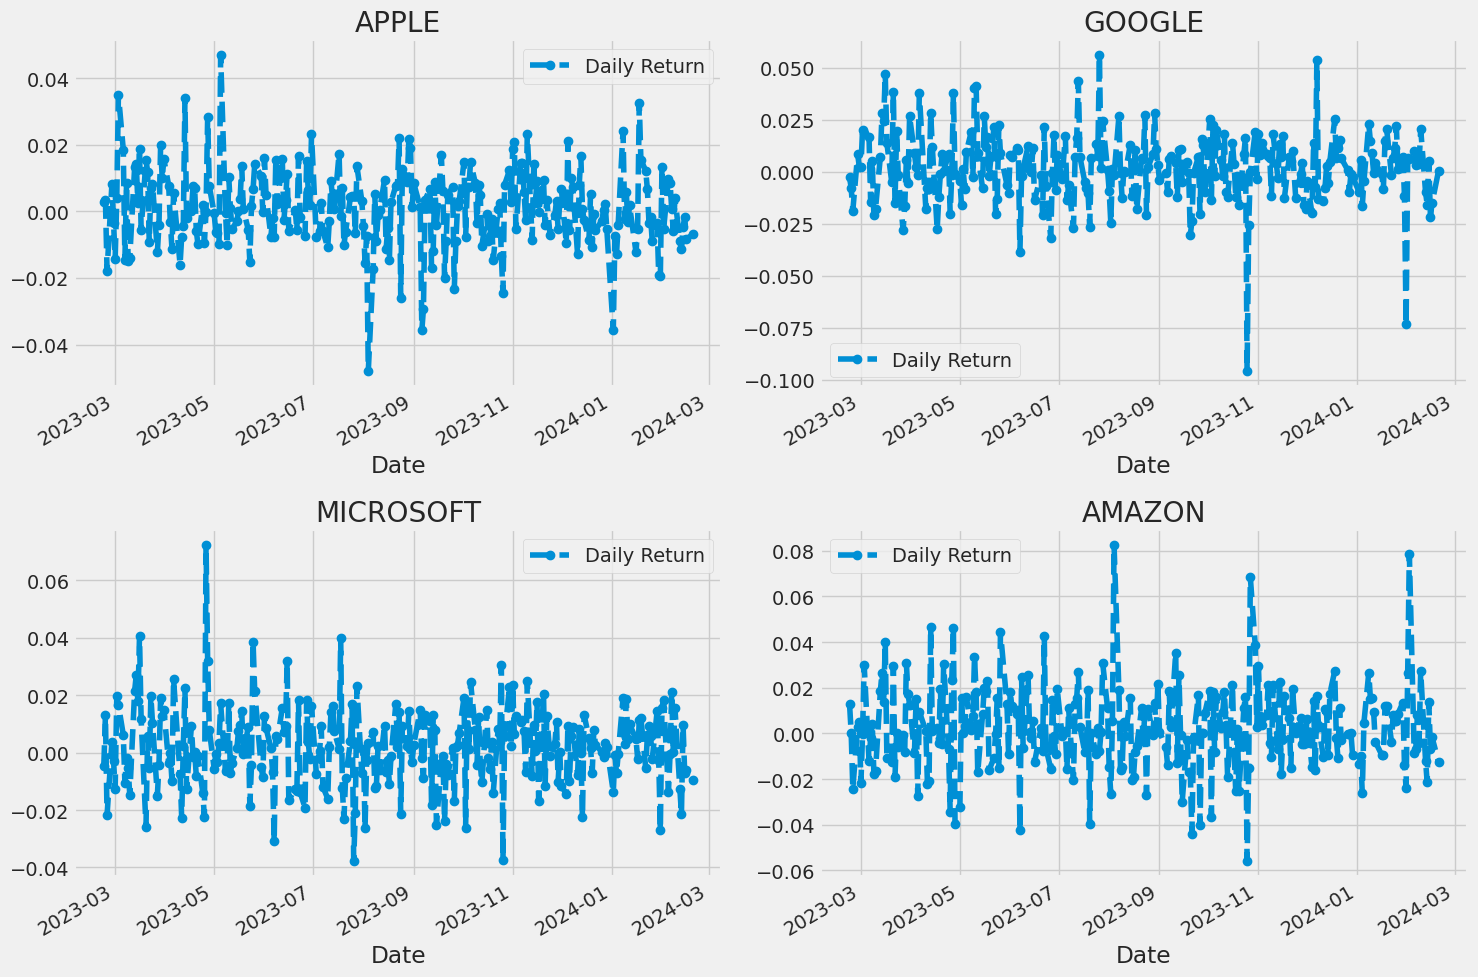

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

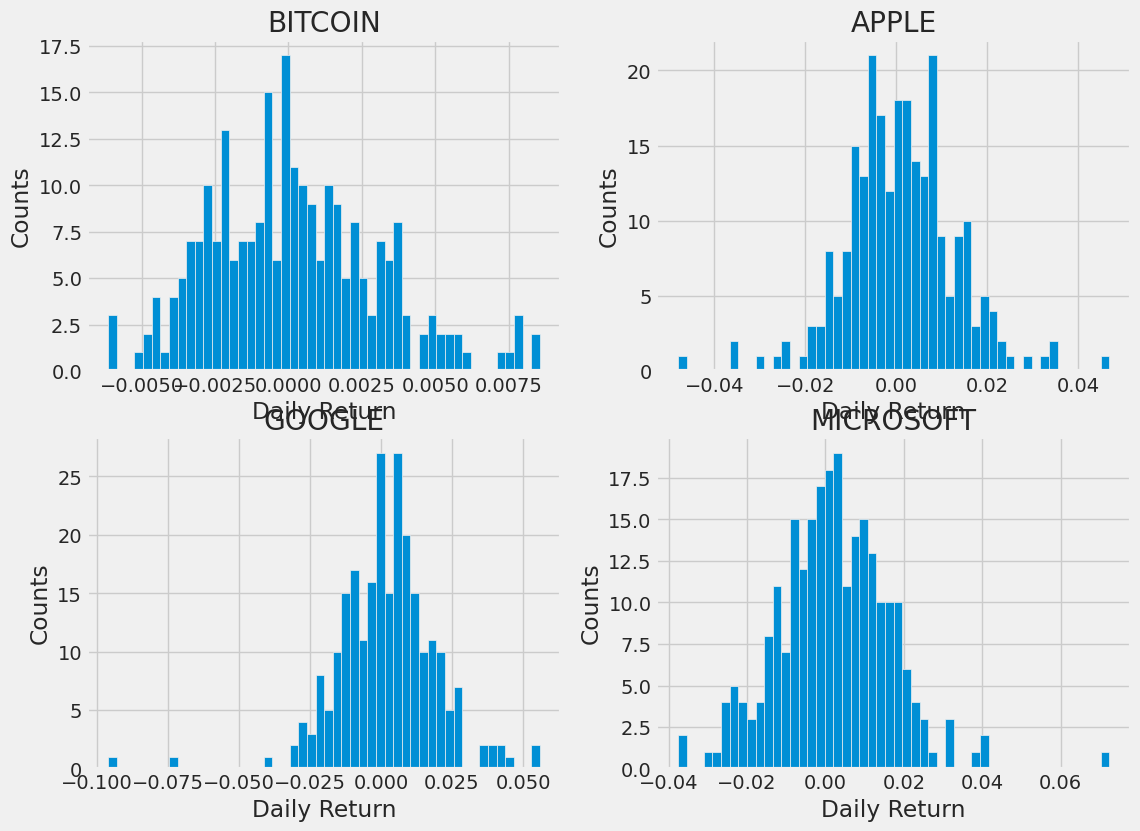

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change() #pct_change() is percentage change between current and previous element
tech_rets.head()

[*********************100%%**********************]  5 of 5 completed


Ticker          AAPL      AMZN       BTC      GOOG      MSFT
Date                                                        
2023-02-21       NaN       NaN       NaN       NaN       NaN
2023-02-22  0.002896  0.012793 -0.000757 -0.002716 -0.004591
2023-02-23  0.003291  0.000313  0.001764 -0.007952  0.012962
2023-02-24 -0.018005 -0.024212 -0.003268 -0.018887 -0.021784
2023-02-27  0.008248  0.002781  0.001237  0.008394  0.003772

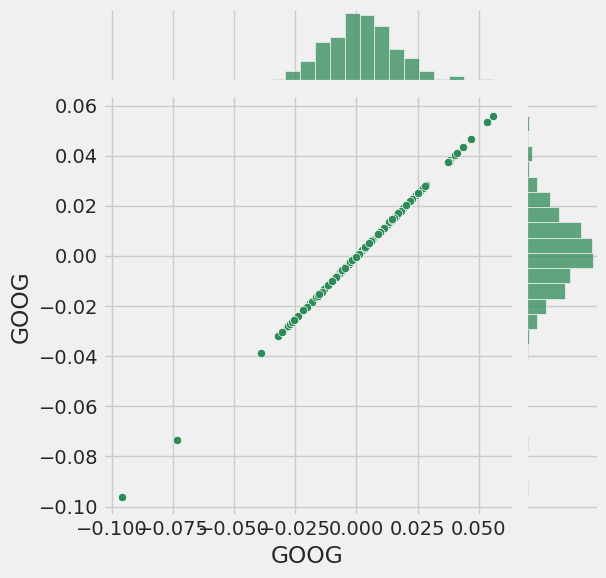

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

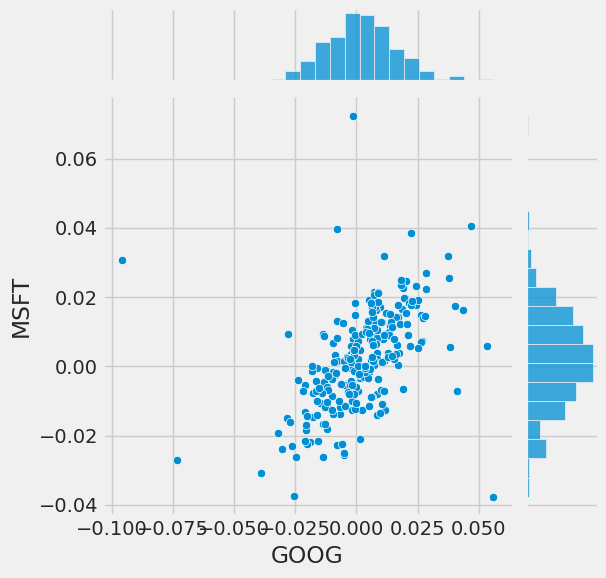

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

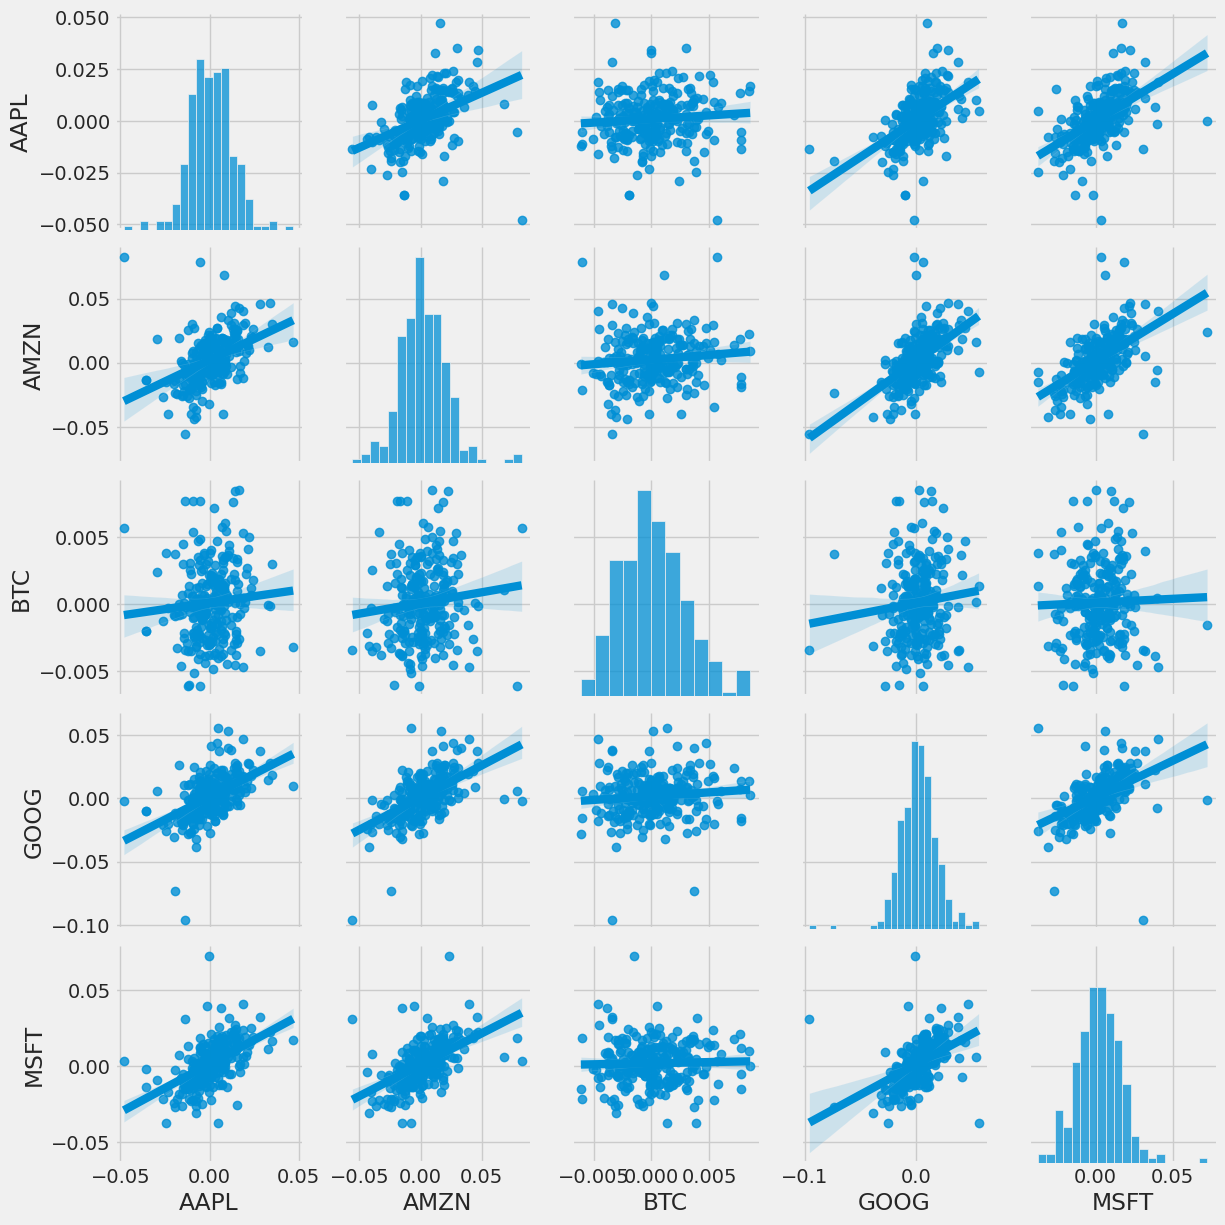

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

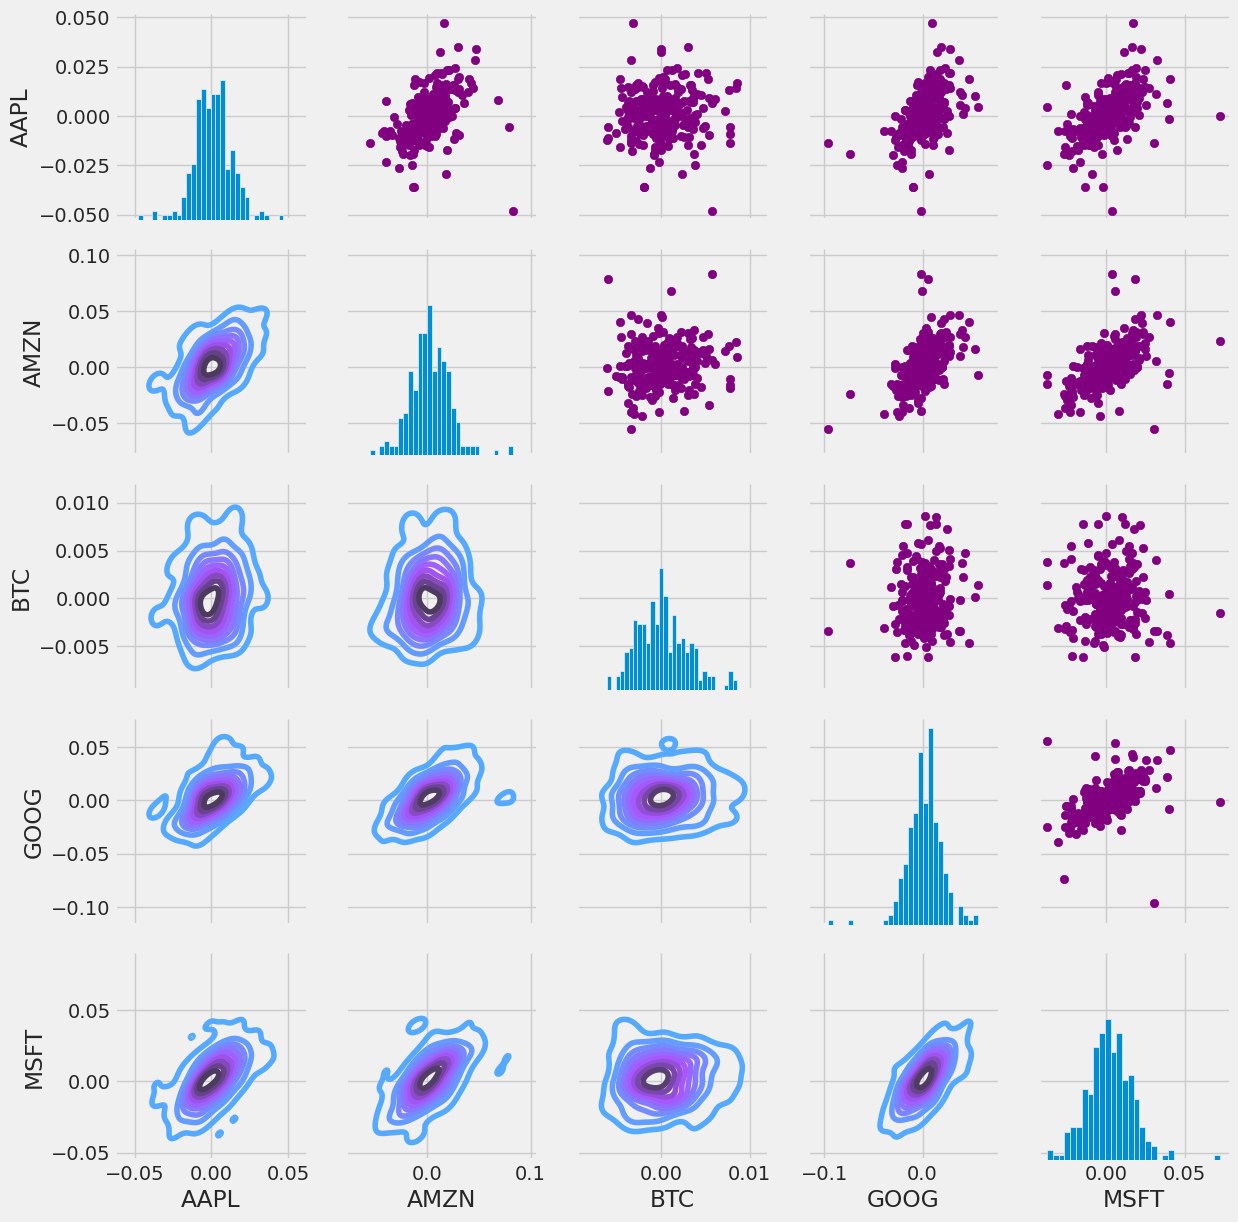

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

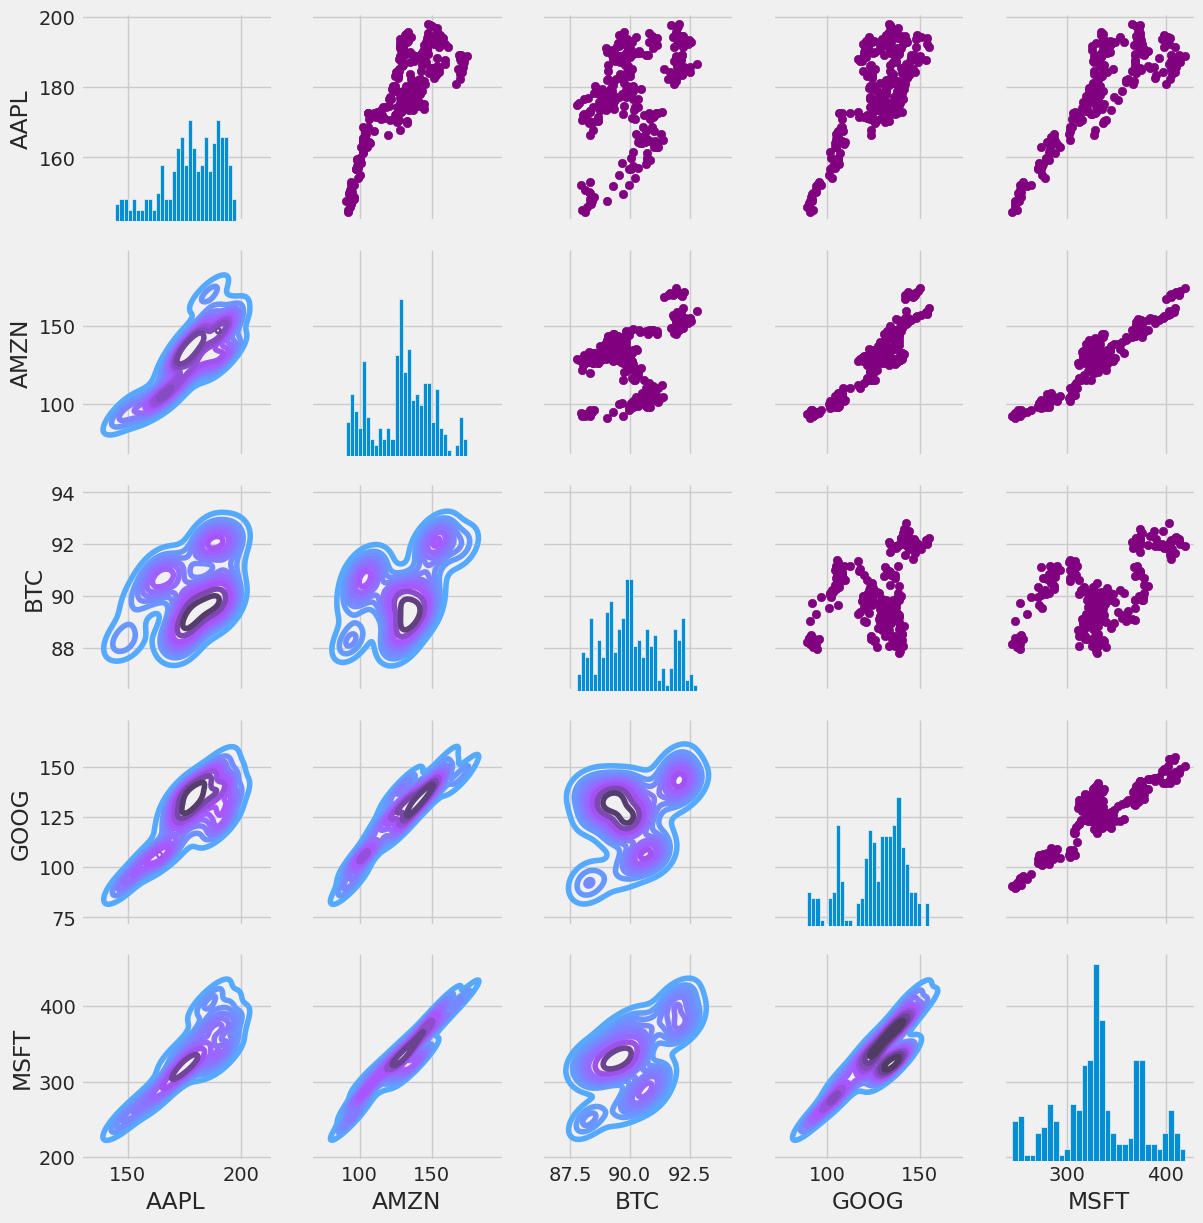

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

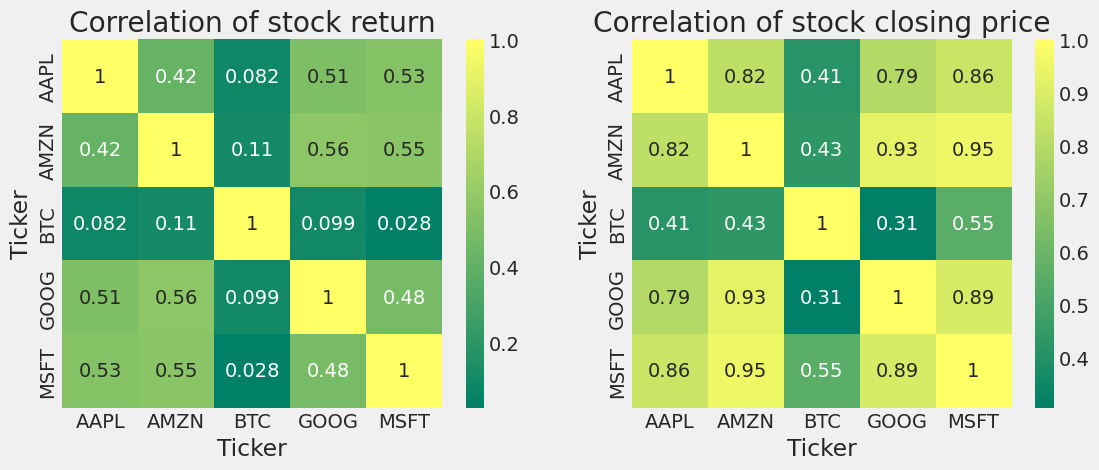

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

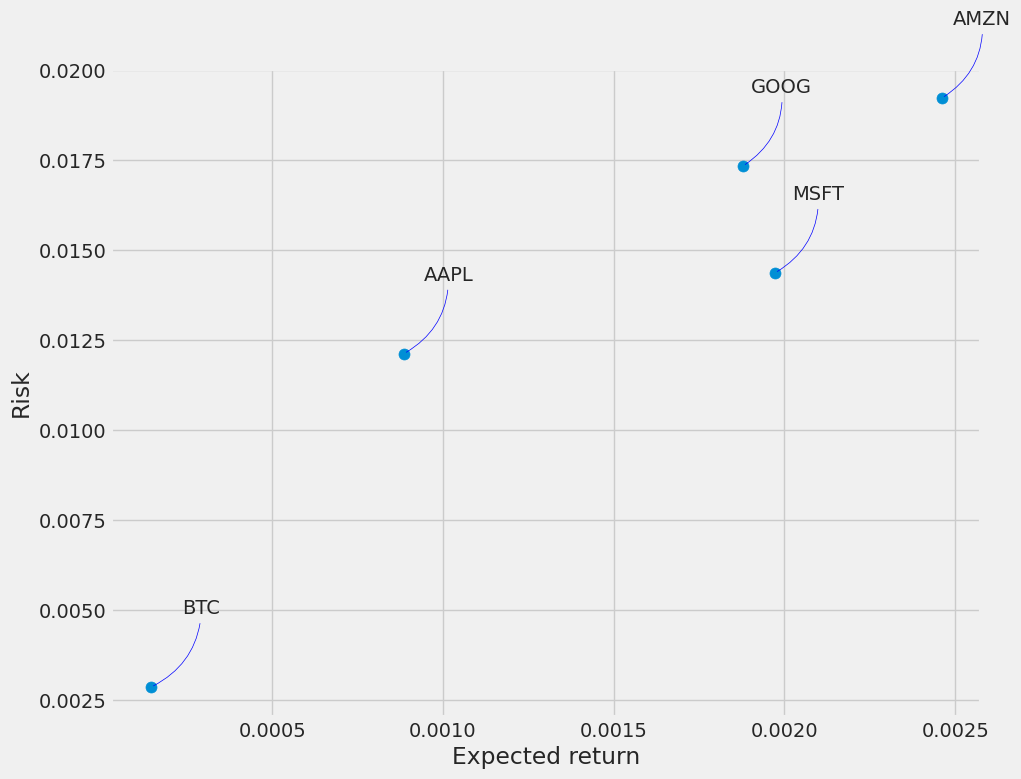

In [21]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area) # std() - standart deviation
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# **Predicting**

In [22]:
# Get the stock quote
df = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-02-16  51937.726562  52537.968750  51641.367188  52160.203125   
2024-02-17  52161.675781  52191.914062  50669.667969  51662.996094   
2024-02-18  51661.968750  52356.964844  51233.707031  52122.546875   
2024-02-19  52134.812500  52483.324219  51711.820312  51779.144531   
2024-02-20  51777.726562  52899.921875  51334.234375  52013.222656   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2024-02-16  52160.203125  28180567298  
2024-02-17  51662.996094  20009091006  
2024-02-18  52122.546875  17595377311  
2024-02-19  51779.144531  21362184346  
2024-02-20  52013.222656  27833812992  

[3444 rows x 6 columns]

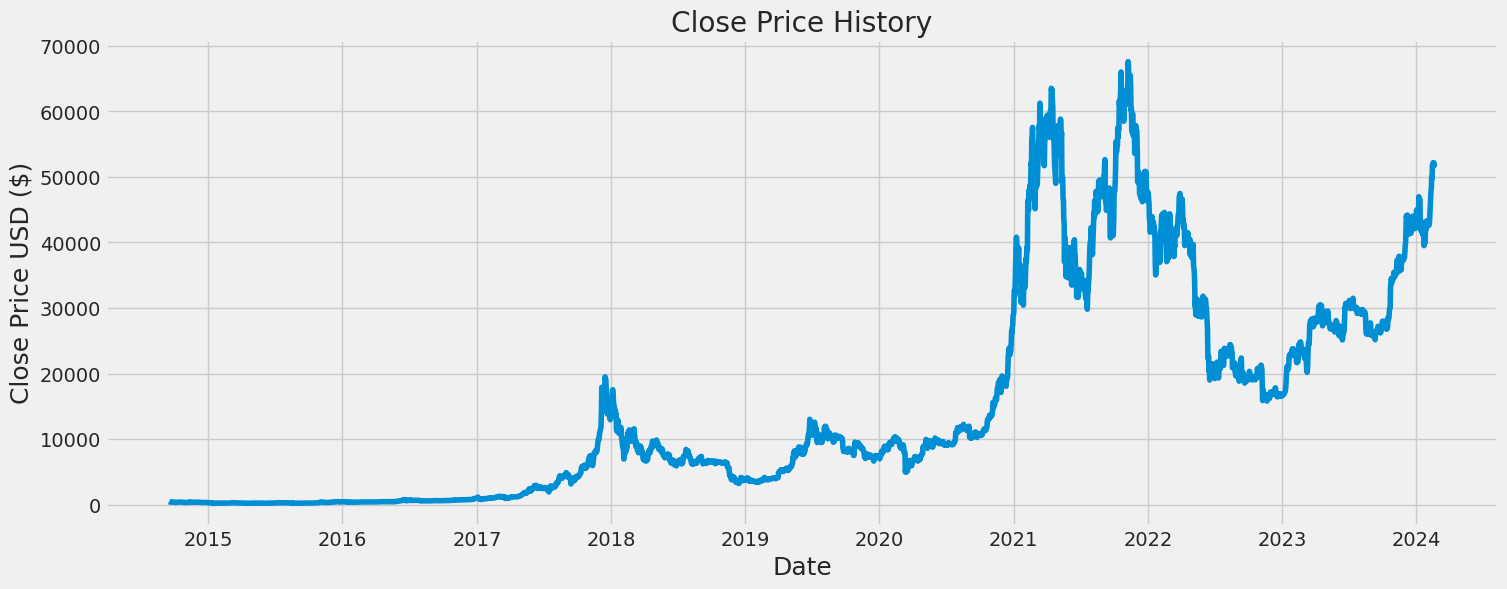

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3272

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.77081802],
       [0.76572218],
       [0.76919573]])

In [26]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

(3212, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(metrics=['accuracy'], optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential

DROPOUT = 0.2
WINDOW_SIZE = 61 - 1

model = keras.Sequential()

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, x_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

BATCH_SIZE = 64

model.compile(
    metrics=['accuracy'],
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
45/45 [==============================] - 34s 518ms/step - loss: 0.0069 - accuracy: 6.9979e-04 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 2/50
45/45 [==============================] - 22s 486ms/step - loss: 0.0088 - accuracy: 6.9979e-04 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 3/50
45/45 [==============================] - 20s 455ms/step - loss: 0.0132 - accuracy: 6.9979e-04 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 4/50
45/45 [==============================] - 22s 480ms/step - loss: 0.0227 - accuracy: 6.9979e-04 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 5/50
45/45 [==============================] - 19s 430ms/step - loss: 0.0237 - accuracy: 6.9979e-04 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 6/50
45/45 [==============================] - 21s 467ms/step - loss: 0.0134 - accuracy: 6.9979e-04 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 7/50
45/45 [==============================] - 19s 432ms/step - loss: 0.0020 - accuracy: 

In [ ]:
scaled_data.shape, training_data_len

((3406, 1), 1000)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
training_data_len = 1000
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

76/76 [==============================] - 10s 104ms/step


3724.250301731733

In [ ]:
predictions.shape

(2406, 1)

<ipython-input-22-d2d693ca5536>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


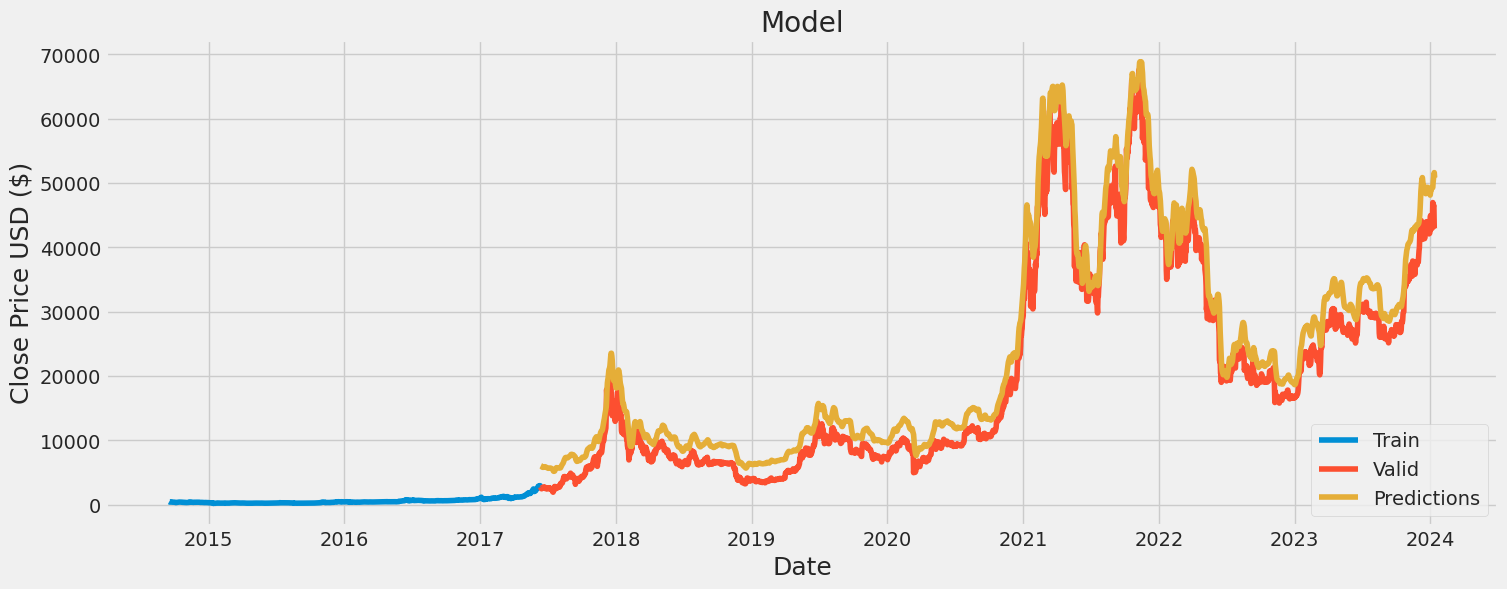

In [ ]:

def plot_data(data, predictions):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
  plt.show()

plot_data(data, predictions)

In [ ]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.6854334 ],
       [0.63326714],
       [0.63223957]])

In [ ]:
def predict_data(data, date):
  # Convert the dataframe to a numpy array
  dataset = data.values

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)



  total_predictions = np.array([])
  day_count = (date - datetime.now()).days
  print("days: " + str(day_count))

  training_data_len = day_count

  x_test = scaled_data
  x_test = np.array(x_test)
  x_test = np.expand_dims(x_test, axis=-1)

  for i in range(training_data_len):

    data_for_prediction = np.expand_dims(x_test[-10:, 0], axis=0)
    print(data_for_prediction.shape)

    predictions = model.predict(data_for_prediction)

    predictions = np.expand_dims(predictions, axis=0)
    x_test = np.vstack((x_test, predictions))
#
    print(predictions)
    print(x_test.shape, predictions.shape)
#
    predictions = scaler.inverse_transform(predictions[0])
    print(predictions.shape)
    total_predictions = np.hstack((total_predictions, np.squeeze(predictions, axis=-1)))

  return total_predictions




In [ ]:
current_date = datetime.now()
end_date = datetime(2026, 8, 31)

prediction = predict_data(data, end_date)

days: 960
(1, 10, 1)
1/1 [==============================] - 4s 4s/step
[[[0.69572544]]]
(3407, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 42ms/step
[[[0.7032289]]]
(3408, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 47ms/step
[[[0.71275234]]]
(3409, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 44ms/step
[[[0.7237163]]]
(3410, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 42ms/step
[[[0.7358035]]]
(3411, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 28ms/step
[[[0.7505249]]]
(3412, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 24ms/step
[[[0.76540273]]]
(3413, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 25ms/step
[[[0.7805979]]]
(3414, 1, 1) (1, 1, 1)
(1, 1)
(1, 10, 1)
1/1 [==============================] - 0s 27ms/step
[[[0.79494655]]]
(3415, 1, 1) (1, 1, 1)
(1, 1)
(1, 10,

In [ ]:
prediction = np.expand_dims(prediction, axis=-1)
prediction

In [ ]:


i = 0
data_list = []
current_date = datetime.now()
day_count = (end_date - current_date).days
print(day_count)
for i in range(day_count):
    current_date += timedelta(days=1)  # increment the date by one day
    _data = {
        'Date': current_date.date(),
        'Close': prediction[i, 0]
    }
    print(current_date.strftime('%Y-%m-%d'), prediction[i, :], i)  # print date as a string in 'YYYY-MM-DD' format
    data_list.append(_data)
    #i += 1
future_price = pd.DataFrame(data_list)
future_price.set_index('Date', inplace=True)

future_price.head()


In [ ]:
def plot_data_future(data, predictions):
  # Plot the data
  old = data[:]
  future = predictions[:]
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(old['Close'])
  plt.plot(future['Close'])
  plt.legend(['Valid', 'Predictions'], loc='lower right')
  plt.show()

plot_data_future(data, future_price)

In [ ]:
np.array(future_price).shape

(960, 1)

##Predicting By Built-In Model



In [1]:
!pip install pystan
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 8.0 MB/s eta 0:00:00


In [28]:
df = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end=datetime.now())
data = pd.DataFrame({'ds': [row[0] for row in df.iterrows()], 'y': df['Close']})
data = data.reset_index(drop=True)
data

[*********************100%%**********************]  1 of 1 completed


ds             y
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
3439 2024-02-16  52160.203125
3440 2024-02-17  51662.996094
3441 2024-02-18  52122.546875
3442 2024-02-19  51779.144531
3443 2024-02-20  52020.496094

[3444 rows x 2 columns]

In [35]:
from prophet import Prophet



model = Prophet()
model.fit(data)

future_dates = model.make_future_dataframe(periods=365)
forecast = model.predict(future_dates)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqnsa3cy/2emkiwdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqnsa3cy/mp6if3hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91998', 'data', 'file=/tmp/tmpuqnsa3cy/2emkiwdv.json', 'init=/tmp/tmpuqnsa3cy/mp6if3hl.json', 'output', 'file=/tmp/tmpuqnsa3cy/prophet_modelj94ce2b2/prophet_model-20240220150341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


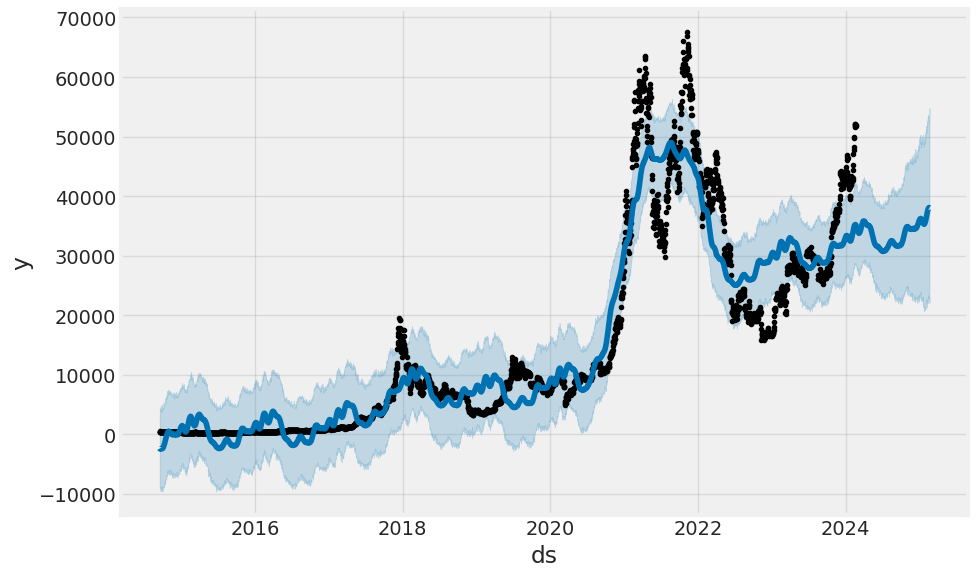

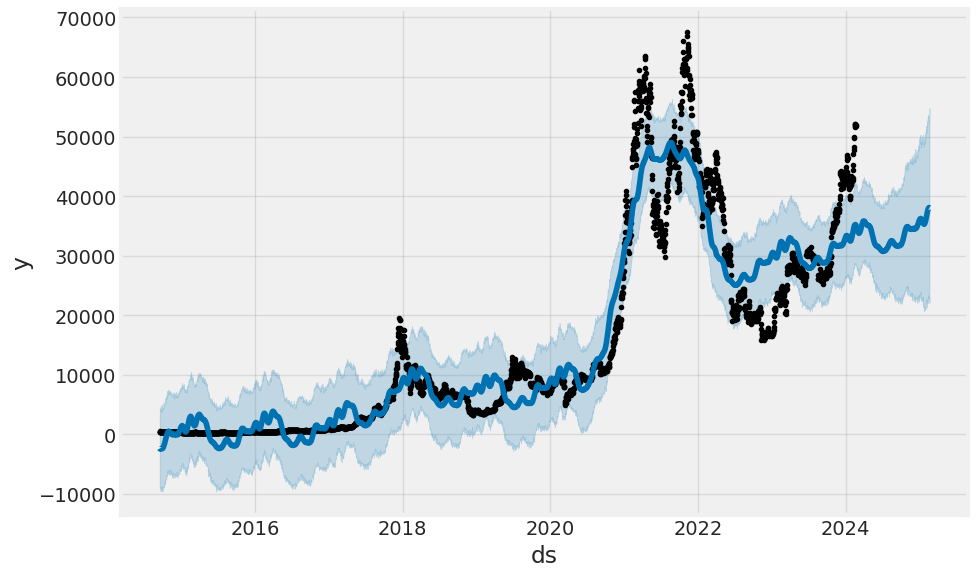

In [36]:
model.plot(forecast)

In [38]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [39]:
plot_components_plotly(model, forecast)